In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers

Using TensorFlow backend.


In [2]:
df = pd.read_csv('./data/Iris2.csv')

In [3]:
#df # Species (1=Iris-setosa; 2=Iris-versicolor and 3=Iris-virginica)

In [4]:
dataset = df.values

In [34]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
5,6,5.4,3.9,1.7,0.4,1
6,7,4.6,3.4,1.4,0.3,1
7,8,5.0,3.4,1.5,0.2,1
8,9,4.4,2.9,1.4,0.2,1
9,10,4.9,3.1,1.5,0.1,1


In [6]:
df.isnull().values.any()

False

In [7]:
X = dataset[:,0:5] 

In [8]:
Y = dataset[:,5]

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
#X_scale

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3) 

In [47]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [48]:
#X_train (5 input features, 70% of full dataset)
#X_val (5 input features, 15% of full dataset)
#X_test (5 input features, 15% of full dataset)
#Y_train (1 label, 70% of full dataset)
#Y_val (1 label, 15% of full dataset)
#Y_test (1 label, 15% of full dataset)

In [49]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(105, 5) (22, 5) (23, 5) (105,) (22,) (23,)


In [50]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [51]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [52]:
optimizer='sgd'

In [53]:
loss='binary_crossentropy'

In [54]:
metrics=['accuracy']

In [55]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 105 samples, validate on 22 samples
Epoch 1/100
105/105 [==============================] - 1s 8ms/step - loss: 0.6221 - acc: 0.3524 - val_loss: 0.4111 - val_acc: 0.3182
Epoch 2/100
105/105 [==============================] - 0s 76us/step - loss: 0.3602 - acc: 0.3524 - val_loss: 0.1254 - val_acc: 0.3182
Epoch 3/100
105/105 [==============================] - 0s 38us/step - loss: 0.1054 - acc: 0.3524 - val_loss: -0.1427 - val_acc: 0.3182
Epoch 4/100
105/105 [==============================] - 0s 76us/step - loss: -0.1470 - acc: 0.3524 - val_loss: -0.4927 - val_acc: 0.3182
Epoch 5/100
105/105 [==============================] - 0s 38us/step - loss: -0.4707 - acc: 0.3524 - val_loss: -0.8825 - val_acc: 0.3182
Epoch 6/100
105/105 [==============================] - 0s 76us/step - loss: -0.8302 - acc: 0.3524 - val_loss: -1.3043 - val_acc: 0.3182
Epoch 7/100
105/105 [==============================] - 0s 76us/step - loss: -1.2257 - acc: 0.3524 - val_loss: -1.8277 - val_acc: 0.3182
Epoch 8/1

105/105 [==============================] - 0s 76us/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 60/100
105/105 [==============================] - 0s 76us/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 61/100
105/105 [==============================] - 0s 76us/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 62/100
105/105 [==============================] - ETA: 0s - loss: -13.9496 - acc: 0.437 - 0s 76us/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 63/100
105/105 [==============================] - 0s 76us/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 64/100
105/105 [==============================] - 0s 76us/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 65/100
105/105 [==============================] - 0s 76us/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182


In [56]:
model.evaluate(X_test, Y_test)[1]

23/23 [==============================] - 0s 0us/step


0.260869562625885

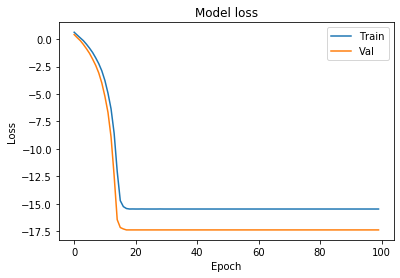

In [57]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

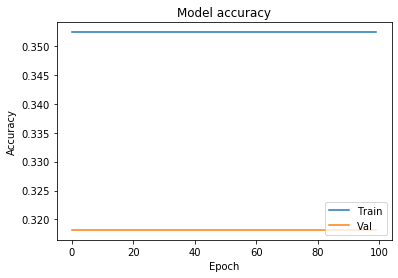

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(5,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 105 samples, validate on 22 samples
Epoch 1/100
105/105 [==============================] - 2s 18ms/step - loss: -0.0499 - acc: 0.2667 - val_loss: -5.5885 - val_acc: 0.3182
Epoch 2/100
105/105 [==============================] - 0s 2ms/step - loss: -9.7836 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 3/100
105/105 [==============================] - 0s 2ms/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 4/100
105/105 [==============================] - 0s 2ms/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 5/100
105/105 [==============================] - 0s 2ms/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 6/100
105/105 [==============================] - 0s 2ms/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 7/100
105/105 [==============================] - 0s 2ms/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.318

105/105 [==============================] - 0s 2ms/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 60/100
105/105 [==============================] - 0s 2ms/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 61/100
105/105 [==============================] - 0s 2ms/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 62/100
105/105 [==============================] - 0s 3ms/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 63/100
105/105 [==============================] - 0s 3ms/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 64/100
105/105 [==============================] - 0s 3ms/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 65/100
105/105 [==============================] - 0s 3ms/step - loss: -15.4869 - acc: 0.3524 - val_loss: -17.3917 - val_acc: 0.3182
Epoch 66/100
105/105 [=========================

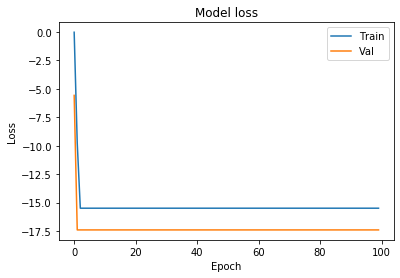

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

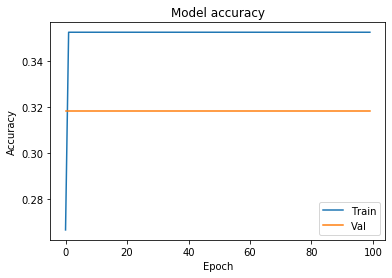

In [ ]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(5,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
kernel_regularizer=regularizers.l2(0.01)

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 105 samples, validate on 22 samples
Epoch 1/100
105/105 [==============================] - 3s 32ms/step - loss: 28.7693 - acc: 0.3143 - val_loss: 20.6375 - val_acc: 0.3182
Epoch 2/100
105/105 [==============================] - 0s 4ms/step - loss: 15.0776 - acc: 0.3524 - val_loss: 4.8562 - val_acc: 0.3182
Epoch 3/100
105/105 [==============================] - 0s 3ms/step - loss: 5.7852 - acc: 0.3524 - val_loss: 1.5968 - val_acc: 0.3182
Epoch 4/100
105/105 [==============================] - 0s 3ms/step - loss: 2.6174 - acc: 0.3524 - val_loss: -1.3288 - val_acc: 0.3182
Epoch 5/100
105/105 [==============================] - 0s 4ms/step - loss: -0.1984 - acc: 0.3524 - val_loss: -3.8748 - val_acc: 0.3182
Epoch 6/100
105/105 [==============================] - 0s 3ms/step - loss: -2.6321 - acc: 0.3524 - val_loss: -6.0414 - val_acc: 0.3182
Epoch 7/100
105/105 [==============================] - 0s 3ms/step - loss: -4.6927 - acc: 0.3524 - val_loss: -7.8543 - val_acc: 0.3182
Epoch 8/100
1

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [ ]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()